![title](https://i.imgur.com/4MEoMNd.png)
![image](http://www.smbc-comics.com/comics/20130120.gif)

# Solving the Schrodinger equation

Over the previous ~~two~~three notebooks, we have slowly built up the numerical tools we need in order to solve the Schrodinger equation in one dimension (finite-difference methods, root finding, and now integration) as well as undertaking a crash course in all things Python (including functions and arrays).

The Schrodinger equation, a linear partial differential equation which describes the time evolution of quantum states, is the corner stone of quantum mechanics. Using the Schrodinger equation as the starting point, we are able to glean information about the bound states, free states, energy levels, and time-evolution of a quantum system. However, whilst analytic solutions to the Schrodinger equation can be found for some systems (for example, the quantum harmonic oscillator), in general it can only be solved numerically. %Thus, being able to find numerical solutions to the Schrodinger equation easily and efficiently is an important skill to have when studying quantum dynamics.

In this notebook, we'll ease slowly into the complexities of quantum dynamical systems, by looking at solving the time-independent Schrodinger equation in one dimension.

In [2]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
%%html
<style>.bs-callout{padding:20px;margin:20px 0;border:1px solid #eee;border-left-width:5px;border-radius:3px}.bs-callout h4{margin-top:0;margin-bottom:5px}.bs-callout p:last-child{margin-bottom:0}.bs-callout code{border-radius:3px}.bs-callout+.bs-callout{margin-top:-5px}.bs-callout-default{border-left-color:#777}.bs-callout-default h4{color:#777}.bs-callout-primary{border-left-color:#428bca; background-color:#e1ecff }.bs-callout-primary h4{color:#428bca}.bs-callout-success{border-left-color:#5cb85c; background-color: #e1ffe5 }.bs-callout-success h4{color:#5cb85c}.bs-callout-danger{border-left-color:#d9534f; background-color: #ffe1e1 }.bs-callout-danger h4{color:#d9534f}.bs-callout-warning{border-left-color:#f0ad4e}.bs-callout-warning h4{color:#f0ad4e}.bs-callout-info{border-left-color:#5bc0de}.bs-callout-info h4{color:#5bc0de}</style>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"><li><span><a href="#Solving-the-Schrodinger-equation" data-toc-modified-id="Solving-the-Schrodinger-equation-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Solving the Schrodinger equation</a></span></li><li><span><a href="#Quick-quantum-refresher" data-toc-modified-id="Quick-quantum-refresher-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Quick quantum refresher</a></span><ul class="toc-item"><li><span><a href="#The-time-independent-Schrodinger-equation" data-toc-modified-id="The-time-independent-Schrodinger-equation-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>The time-independent Schrodinger equation</a></span></li></ul></li><li><span><a href="#Boundary-value-problems" data-toc-modified-id="Boundary-value-problems-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Boundary value problems</a></span><ul class="toc-item"><li><span><a href="#The-Shooting-method" data-toc-modified-id="The-Shooting-method-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The Shooting method</a></span></li><li><span><a href="#Linear-Shooting-Method" data-toc-modified-id="Linear-Shooting-Method-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Linear Shooting Method</a></span></li><li><span><a href="#Linear-shooting-with-homogeneous-boundaries" data-toc-modified-id="Linear-shooting-with-homogeneous-boundaries-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Linear shooting with homogeneous boundaries</a></span></li></ul></li><li><span><a href="#Shooting-the-Schrodinger-equation" data-toc-modified-id="Shooting-the-Schrodinger-equation-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Shooting the Schrodinger equation</a></span><ul class="toc-item"><li><span><a href="#Discretising-the-Schrodinger-equation" data-toc-modified-id="Discretising-the-Schrodinger-equation-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Discretising the Schrodinger equation</a></span></li><li><span><a href="#Discretising-the-initial-conditions" data-toc-modified-id="Discretising-the-initial-conditions-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Discretising the initial conditions</a></span></li><li><span><a href="#Normalisation" data-toc-modified-id="Normalisation-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Normalisation</a></span></li></ul></li><li><span><a href="#The-Eigenvalue-Problem" data-toc-modified-id="The-Eigenvalue-Problem-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>The Eigenvalue Problem</a></span><ul class="toc-item"><li><span><a href="#The-Morse-potential" data-toc-modified-id="The-Morse-potential-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>The Morse potential</a></span></li></ul></li></ul></div>

# Quick quantum refresher

In its most general form, the Schrodinger equation is

\begin{align}
	i\hbar \frac{\partial }{\partial t}\psi(x,t) = \hat{H}\psi(x,t),
\end{align}

where $\hbar$ is Planck's constant, $\psi(x,t)$ is the **wavefunction** of the quantum system, and $\hat{H}$ is the **Hamiltonian**.

The Hamiltonian operator represents the total energy of the system, kinetic energy, $\hat{T}=\hat{p}/2m^2$, plus potential energy $\hat{V}=V(x,t)$:

\begin{align}
	\hat{H} = \hat{T} +\hat{V} = \frac{\hat{p}^2}{2m} + V(x,t).
\end{align}

In position space, the momentum operator is simply $\hat{p} = -i\hbar \frac{\partial}{\partial x}$. Putting this all together, get the 1D Schrodinger equation:

\begin{align}
	\boxed{i\hbar \frac{\partial }{\partial t}\psi(x,t) = \left( -\frac{\hbar^2}{2m}\frac{\partial^2}{\partial x^2} + V(x,t) \right)\psi(x,t)}
\end{align}

Or, using braket notation, $\left\langle x \middle| \psi(t)\right\rangle=\psi(x,t)$, $$i\hbar \frac{\partial}{\partial t}|\psi(t)\rangle=\hat{H}|\psi(t)\rangle$$

## The time-independent Schrodinger equation

Let's assume that the potential (and thus Hamiltonian) in our quantum system is time-independent; as a result, the solution to the Schrodinger equation is *separable* in time and space,

\begin{align}
	\psi(x,t) = \varphi(x)f(t).
\end{align}

Substituting this back into the Schrodinger equation, 

\begin{align}
	i\hbar \varphi(x)\frac{df}{dt} = -\frac{\hbar^2}{2m}\frac{d^2 \varphi}{dx^2}f(t)+V(x)\varphi(x)f(t),
\end{align}

and using separation of variables,

\begin{align}
	i\hbar \frac{1}{f(t)}\frac{df}{dt} = \left(-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+V(x)\right)\varphi(x) = E.
\end{align}

As the left-hand side depends only on $t$, and the right-hand side depends only on $x$, the fact that they are equal means that **they both must have constant value**. Here, we have called this constant $E$.

We can use this fact to solve the differential equation for $f(t)$:

\begin{align}
	\frac{df}{dt} = -\frac{iE}{\hbar}f(t) ~~~\Rightarrow~~~ f(t) \propto e^{-iEt/\hbar}.
\end{align}

Therefore, the general solution is given by

\begin{align}
	\psi(x,t) = \varphi(x)e^{-iEt/\hbar}.
\end{align}

where $\varphi$ satisfies what we call the **time-independent Schrodingers equation**:

\begin{align}
	\boxed{\hat{H}\varphi(x) = E\varphi(x)}
\end{align}

Or, in braket notation where $\left\langle{x}\middle|{\varphi}\right\rangle=\varphi(x)$, this is written $\hat{H}|{\varphi}\rangle=E|{\varphi}\rangle$

The solutions $\varphi_N(x)$ to this equation provide the **bound states** or **stationary states** of the system, as well as their respective energy levels $E_N$. Note that this is also an **eigenvalue equation**. Since the Hamiltonian $\hat{H}$ is by definition an Hermitian operator, from linear algebra, we know that:

1. The eigenvalues $E_N$ are always **real**

2. The eigenvectors $\varphi_N(x)$ are **linearly independent** and **orthogonal** with respect to the Hilbert space inner product:


$$\left\langle{\varphi_i(x)}\middle|{\varphi_j(x)}\right\rangle = \int_{-\infty}^{\infty} \varphi_i(x)^*\varphi_j(x) dx = \delta_{ij}$$

# Boundary value problems

Back when we first looked at solving differential equations using numerical methods, we were concerned with initial value problems (IVPs) - how a system evolves assuming we know its value and derivative(s) at $x=x_0$:

\begin{align}
	y''(x) = f(y(x),y'(x),x), ~~y(x_0)=a,~~ y'(x_0)=\alpha.
\end{align}

In most cases, initial value problem has a unique solution for a particular set of initial conditions.

However, the time-independent Schrodinger equation takes the form of a partial differential wave equation -- instead of dealing with an initial-value problem, we have a **boundary value problem**:

\begin{align}
	y''(x) = f(y(x),y'(x),x), ~~y(x_0)=a,~~ y(x_N)=b.
\end{align}

Unlike the initial value problem, the boundary value problem (BVP) doesn't have unique solutions! There will be numerous solutions, each corresponding to a different eigenvalue $\lambda_i$ of the differential equation. This is why we get multiple stationary wavefunctions and energy levels when solving the time-independent Schrodinger equation.

## The Shooting method

One approach to dealing with boundary value problems is to try and convert them to initial value problems, and then solve them like we did previously. Consider the boundary value problem

\begin{align}
	\boxed{y''(x) = f(y(x),y'(x),x), ~~y(x_0)=a,~~ y(x_N)=b.}
\end{align}

Let $u_\alpha(x)$ be a solution to the equivalent initial value problem:

\begin{align}
	u_\alpha''(x) = f(u_\alpha(x),u_\alpha'(x),x), ~~u_\alpha(x_0)=a,~~ u_\alpha'(x_0)=\alpha.
\end{align}

Consider the difference between the two solutions at the end point of the boundary, $x=x_N$:

\begin{align}
	g(\alpha) = u_\alpha(x_N) - y(x_N) = u_\alpha(x_N) - b.
\end{align}

Therefore, in order numerically solve for $y(x)$, we need to numerically solve for $u_\alpha(x)$ satisfying the following:

\begin{equation}
	\boxed{
	\begin{aligned}
		& u_\alpha''(x) = f(u_\alpha(x),u_\alpha'(x),x), ~~u_\alpha(x_0)=a,~~ u_\alpha'(x_0)=\alpha,\\[7pt]
		& g(\alpha) = u_\alpha(x_N) - b = 0.
	\end{aligned}
	}
\end{equation}

This is slightly more complicated than just solving an initial value problem! This involves guessing $\alpha$, solving the differential equation, and then using a **root-finding** algorithm (for example, the bisection method) to determine a better estimate for $\alpha$. Then repeat the process, until your estimate of $\alpha$ starts to converge ($|\alpha_{j+1}-\alpha_j|\leq \epsilon$).

<br>
<div class="alert alert-success">
**Why is it called the shooting method?**
<br>
Because we treat the boundary value problem as an IVP with unknown initial gradient, and are solving or 'shooting' to find the value at the other boundary. If we miss our mark, we then adjust the initial gradient and shoot again.
</div>

---
<div class="alert alert-warning">
**Example: shooting method**
<br>
Solve the following differential equation via the bisecting shooting method $$y''+5y=5x,~~~y(0)=1, ~~~y(1)=0.$$
</div>

To solve this via the shooting method, we consider the initial value problem

$$u_\alpha''+5u_\alpha=-5x,~~~u_\alpha(0)=1,~~~u_\alpha'(0)=\alpha.$$

This can be solved numerically using the method of finite-differences to approximate the second derivative, and rearranging to get an iterative solution,

$$ \frac{u_{n+1}-2u_{n}+u_{n-1}}{\Delta x^2} +5u_{n}\approx -5x_n ~~~\Rightarrow~~~ u_{n+1} \approx -5u_{n}\Delta x^2 - 5x_n\Delta x^2 + 2u_n -u_{n-1}$$

where $u_n$ is implicitly a function of $\alpha$, and corresponds to $u_\alpha(x_n)$.

In [3]:
dx = 0.01
N = int((1-0)/dx + 1)
x = np.arange(0,1+dx,dx)

def soln(alpha):
    u = np.zeros(x.shape)

    u[0] = 1
    u[1] = alpha*dx + 1

    for i in range(2,N):
        u[i] = -5*(dx**2)*u[i-1] - 5*(dx**2)*x[i-1] + 2*u[i-1] - u[i-2] 
        
    return u

For our first two estimates of $\alpha$, let's choose $\alpha_1=1$ and $\alpha_2=5$.

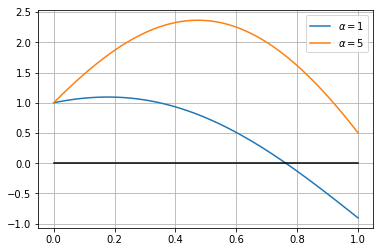

In [4]:
plt.plot(x, soln(1))
plt.plot(x, soln(5))
plt.plot(x,np.zeros(x.shape), color='black')
plt.legend([r'$\alpha={}$'.format(i) for i in [1,5]])
plt.grid()

Looking at the boundaries, we have $u_{\alpha_1}(1)<0$ and $u_{\alpha_2}(1)>0$. Thus, the correct value of $\alpha$ must like somewhere *in-between* these two starting guesses for the right hand boundary condition to be satisfied.

So for the third estimate of $\alpha$, let's bisect this interval:

$$\alpha_3 = \frac{1}{2}(1+5) = 3.$$

Now, we have $u_{\alpha_3}(1)<0$ -- so the next estimate must lie in the interval $\alpha\in(3,4)$. Bisecting this interval, 

$$\alpha_4=\frac{1}{2}(3+4) = 3.5.$$


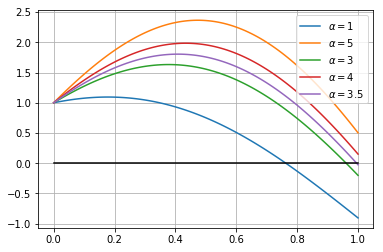

In [5]:
plt.plot(x, soln(1))
plt.plot(x, soln(5))
plt.plot(x, soln(3))
plt.plot(x, soln(4))
plt.plot(x, soln(3.5))
plt.plot(x,np.zeros(x.shape), color='black')
plt.legend([r'$\alpha={}$'.format(i) for i in [1,5,3,4,3.5]])
plt.grid()

We continue bisecting until $\alpha$ converges to a value. In this case, $\alpha=3.59655$, and thus $u_{3.59655}(x)$ is the solution to the boundary value problem:

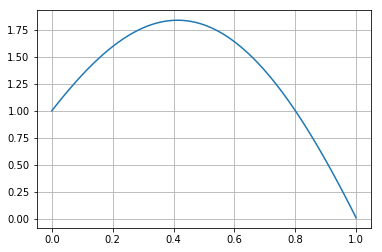

In [6]:
plt.plot(x,soln(3.59655))
plt.grid()

---
## Linear Shooting Method

Linear boundary value problems are such that $f(y(x),y'(x),x)$ is a *linear* function -- that is, we are able to write the differential equation in the following form:

\begin{align}
	y''(x) + P(x)y'(x)+Q(x)y(x)=R(x)
\end{align}

and they satisfy linearity - if $u(x)$ and $v(x)$ is a solution to the ODE, than so is $w(x)=c_1 u(x)+c_2 v(x)$.

Note that the time-independent Schrodinger equation is a linear partial differential equation; writing it in this form it becomes

\begin{align}
	\psi''(x) + \frac{2m}{\hbar^2}\left[ E-V(x)  \right]\psi(x) = 0.
\end{align}

So, can we use the linearity of these systems to improve on the previous section, where the conversion of a BVP to a IVP resulted in having to guess the initial value $\alpha$?

Turns out we can! Walk with me here.

<div class="bs-callout bs-callout-danger">
Consider the linear boundary value problem 
<br><br>
\begin{align}
	y''(x) + P(x)y'(x)+Q(x)y(x) = R(x), ~~y(x_0)=a,~~ y(x_N)=b,
\end{align}
<br><br>
as well as the following two initial value problems,
<br><br>
\begin{align*}
	& u''(x) + P(x)u'(x)+Q(x)u(x) = R(x), &~~u(x_0)=a,~~ u'(x_0)=0\\
	& v''(x) + P(x)v'(x)+Q(x)v(x)=0, &~~v(x_0)=0,~~ v'(x_0)=s
\end{align*}
<br><br>
where the ODE satisfied by $v(x)$ is **homogeneous** ($R(x)=0$), and $s$ is an arbitrary constant known as the **free shooting parameter**.
<br><br>
Now, let $w(x) = u(x)+\theta v(x)$. Due to linearity, $w(x)$ satisfies both initial value problems, with 
<br><br>
\begin{align}
	& w(x_0) = u(x_0) + \theta v(x_0) = a\\
	& w'(x_0) = u'(x_0) + \theta v'(x_0) = \theta s.
\end{align}
<br><br>
Furthermore, if $w(x_N) = u(x_N) + \theta v(x_N) = b$, then $w(x)$ also satisfies the boundary value problem! Let's solve for the value of $\theta$ where this boundary condition is met:
<br><br>
\begin{align}
	\theta = \frac{b-u(x_N)}{v(x_N)}.
\end{align}
<br><br>
Therefore, the solution to the linear boundary value problem is
<br><br>
\begin{align}
	y(x) = u(x) + \frac{b-u(x_N)}{v(x_N)}v(x).
\end{align}
</div>

This already looks like a better algorithm -- simply solve two initial value problems (rather than one) with specified (rather than free) initial conditions, and a linear superposition provides the solution to the boundary value problem. No more having to iterate/bisect the initial conditions until convergence!

However, there is a small caveat (have you spotted it?).

In order for the correct value of $\theta$ to be found, we must have $v(x_N)\neq 0$. From Sturm-Liouville theory, this is only guaranteed when $Q(x)\leq 0$ for $x\in[x_0,x_N]$, or in the case of the time-independent Schrodinger equation, when $E\leq V(x)$. If this condition is not met, than it is possible (but not *certain*) that no solution to the boundary value problem exists.

<div class="bs-callout bs-callout-success">
<h4>In summary</h4>
<br>
To use the linear shooting method to solve the boundary value problem <br><br>
$$y''(x)=P(x)y'(x)+Q(x)y(x)=R(x),~~~y(x_0)=a,~~~y(x_N)=b,$$
<ol>
<li> Solve the initial value problems
<br>
\begin{align*}
    & u''(x) + P(x)u'(x)+Q(x)u(x) = R(x), &~~u(x_0)=a,~~ u'(x_0)=0\\
	& v''(x) + P(x)v'(x)+Q(x)v(x)=0, &~~v(x_0)=0,~~ v'(x_0)=s
\end{align*}
<br>
for any value of $s\neq 0$, using a numerical method (Euler/leap-frog etc) of your choice. </li>
<br><br>
<li>If $v(x_N)\neq 0$, then the solution to the boundary value problem is 
<br>
\begin{align*}
    y(x) = u(x) + \frac{b-u(x_N)}{v(x_N)}v(x).
\end{align*}
<br>
Otherwise, no solutions to the boundary value problem may exist.</li>
</ol>
</div>


## Linear shooting with homogeneous boundaries

What happens if a system has a linear *and* homogeneous ODE, and left boundary value of zero? For example, consider the boundary value problem

\begin{align}
	y''(x) + P(x)y'(x)+Q(x)y(x) = 0, ~~y(x_0)=0,~~ y(x_N)=b.
\end{align}

This problem is both homogeneous ($R(x)=0$), linear, and the left boundary has value $y(x_0)=0$.

Let's proceed as we did above, and see what happens.

---

Define the two initial value problems

\begin{align*}
	& u''(x) + P(x)u'(x)+Q(x)u(x)=0, &~~u(x_0)=0,~~ u'(x_0)=0,\\
	& v''(x) + P(x)v'(x)+Q(x)v(x)=0, &~~v(x_0)=0,~~ v'(x_0)=s,
\end{align*}

where $s\neq 0$ is the free shooting parameter.

Unlike previously, the differential equation for $u(x)$ now is *also* homogeneous, with homogeneous initial conditions. Since the trivial solution $u(x)=0$ satisfies both the ODE and the initial conditions, from the uniqueness theorem we can deduce that $u(x)=0$ is the *only solution*.

Therefore, the solution to the boundary value problem becomes

\begin{align}
    y(x) = u(x) + \frac{b-u(x_N)}{v(x_N)}v(x)  = \frac{b}{v(x_N)}v(x).
\end{align}

The solution $y(x)$ is simply a constant rescaling of $v(x)$, the equivalent initial value problem!

And not only that, it doesn't even matter what we choose $v'(x_0)=s$ to be, as the free shooting parameter $s$ doesn't feature in the above equation.

How nice.


<div class="bs-callout bs-callout-success">
<h4>In summary</h4>
<br>
To use the linear shooting method to solve the **homogeneous** boundary value problem <br><br>
\begin{align*}
    & y''(x) + P(x)y'(x)+Q(x)y(x) = 0, &~~y(x_0)=0,~~ y(x_N)=b,
\end{align*}
<ol>
<li> Solve the initial value problem
<br>
\begin{align*}
		& v''(x) + P(x)v'(x)+Q(x)v(x)=0, &~~v(x_0)=0,~~ v'(x_0)=s
\end{align*}
<br>
for any value of $s\neq 0$, using a numerical method (Euler/leap-frog etc) of your choice. </li>
<br><br>
<li>If $v(x_N)\neq 0$, then the solution to the boundary value problem is 
<br>
\begin{align*}
    y(x) = \frac{b}{v(x_N)}v(x).
\end{align*}
<br>
Otherwise, no solutions to the boundary value problem may exist.</li>
</ol>
</div>

<div class="alert alert-info">
**Problem 1**:
<br>
Use the linear shooting method to solve the boundary value problem $y''(x)+\tan(x) y(x)=0$ with $y(-1) = 0$, and $y(1)=0.5$.
</div>

# Shooting the Schrodinger equation

Let's now go back to the time-independent Schrodinger equation, and try and apply the shooting method to find solutions. 

Recall the the time-independent Schrodinger equation is 

\begin{align}
    -\frac{\hbar^2}{2m}\psi''(x) + V(x)\psi(x)=E\psi(x).
\end{align}

In cases where $V(x)\rightarrow\infty$ as $x\rightarrow\pm\infty$, a reasonable boundary condition to impose is

\begin{align}
	\psi(x)\rightarrow 0 ~~\text{as}~~ x\rightarrow\pm \infty.
\end{align}


<div class="bs-callout bs-callout-success">
<h4>Why must the wavefunction decay when $V > E$?</h4>

Write the Schrodinger equation in the form $\psi''(x) + \lambda^2\psi(x) = 0, ~~~\lambda^2\sim\left[ E-V(x)  \right]$ for $x\rightarrow\pm\infty$.
<br><br>
In this region, $V(x)>E~~ \Rightarrow ~~\lambda\leq 0$ and so the solution is $$\psi(x)\sim A e^{-\lambda x}+B e^{\lambda x}.$$
<br>
The Hilbert space requires $\psi(x)$ be **square integrable** -- it cannot 'blow up' to infinity. So, as $x\rightarrow\pm\infty$, $V(x)> E$, and $\psi(x)\sim e^{-\lambda |x|}\rightarrow 0$.
</div>

Although, you might argue that boundary conditions at infinite $x$ values aren't *really* that reasonable when we're trying to solve the system numerically. Okay, I hear you. Let's try and approximate some finite boundary conditions.

Assuming $V(x)$ is centered on the origin, let's work on the finite domain $-a\leq x\leq a$, with $a$ chosen such that $V(\pm a)$ is sufficiently large to ensure that $\psi(\pm a)\approx 0$. In this case, we have the finite boundary conditions

\begin{align}
	\psi(-a)\approx 0, ~~~\psi(a)\approx 0.
\end{align}

Since the boundary value problem is linear, homogeneous, and the left boundary value is $0$, we know from the previous section that (up to a constant rescaling factor) this is equivalent to solving the initial value problem

\begin{align}
	& -\frac{\hbar^2}{2m}\psi''(x) + V(x)\psi(x) = E\psi(x), ~~ \psi(-a) = 0, ~~~\psi'(-a) = s,
\end{align}

where $s$ is a free shooting parameter and can take any non-zero real value.

## Discretising the Schrodinger equation

Let's discretise the $x$ grid between $x\in[x_0,x_{N-1}]$ using $N$ points,

\begin{align}
	x_{j+1} = x_j + \Delta x ~~\text{where}~~ \Delta x = \frac{x_{N-1}-x_0}{N-1}.
\end{align}


Using the **second derivative central difference formula** method to approximate the double derivative,

\begin{align}
	f''(x) = \frac{f(x+\Delta x)-2f(x)+f(x-\Delta x)}{(\Delta x)^2} + O(\Delta x^2),
\end{align}

and denoting $\psi_j = \psi(x_j)$ and $V_j=V(x_j)$, we get at a discretised time-dependent Schr"odinger equation, accurate to second order:

\begin{align}
	-\frac{\hbar^2}{2m}\frac{\psi_{j+1}-2\psi_j+\psi_{j-1}}{\Delta x^2} + V(x)\psi_j +\mathcal{O}((\Delta x)^2) = E\psi_j.
\end{align}

Rearranging this into a more iterative form,

\begin{align}
	\boxed{\psi_{j+1} = 2\left[\frac{m(\Delta x)^2}{\hbar^2}(V_j-E)+1\right]\psi_j-\psi_{j-1}, ~~~~j=1,2,\dots,N-2}
\end{align}

## Discretising the initial conditions

Let's set the endpoints of our discretised grid to $x_0=-a$ and $x_{N-1}=a$, ensuring the boundary conditions $\psi_0\approx 0$, and $\psi_{N-1}\approx 0$. From the forward Euler approximation to the derivative,

\begin{align}
	\psi'(x_0) \approx \frac{\psi(x_0+\Delta x)-\psi(x_0)}{\Delta x} = \frac{\psi_1-\psi_0}{\Delta x},
\end{align}

thus the initial condition $\psi'(x_0)$ provides us with the value of $\psi_1$,

\begin{align}
\psi_1 = \psi'(x_0)\Delta x+\psi_0.
\end{align}

Therefore, we can convert the time-independent Schordinger equation into a discretised *initial value problem*,

\begin{equation}
	\boxed{
	\begin{aligned}
	&\psi_{j+1} = 2\left[\frac{m(\Delta x)^2}{\hbar^2}(V_j-E)+1\right]\psi_j-\psi_{j-1}, ~~~~j=1,2,\dots\\
	&\psi_0 = 0, ~~~ \psi_1 = s
	\end{aligned}
	}
\end{equation}

where $s\neq 0$ is the free shooting parameter.

<div class="alert alert-info">
**Problem 2**:
<br>
Use the shooting method to solve for the seventh excited state of the quantum harmonic oscillator.
<br><br>
The quantum harmonic oscillator has potential given by $V(x)=\frac{1}{2}m_e\omega^2 x^2$, and the $n$th state wavefunction has energy $E=\left(n+\frac{1}{2}\right)\hbar\omega$.
<br><br>
Solve this problem using the following parameters, $$\Delta x =0.01,~~~~x_0 = -5,~~~~x_{N-1}=5$$ assuming **atomic units**, $$\hbar=\omega=m_e=1$$ and the initial conditions $$\psi_0=0, ~~~~\psi_1=10^{-3}$$
When done, plot $|\psi(x)|^2$ and $V(x)$ on the same plot.
</div>

<div class="bs-callout bs-callout-success">
<h4>Symmetric potentials</h4>
<br>
If $n$ is even, then the wavefunction will be **even**: $\psi(-x)=\psi(x)$.
<br><br>
If $n$ is odd, then the wavefunction will be **odd**: $\psi(-x)=-\psi(x)$.
<br><br>
So if we choose the second initial condition such that $s\sim(-1)^n10^{-5}$, then we will always approach the right boundary **from above**: $$\psi_{N-2}>\psi_{N-1}=0$$
</div>

## Normalisation

Assuming we know the energy $E$ of the state we wish to find, we now have all we need to implement the shooting method! All that's left to do is to rescale the solution of the initial value problem so that the right hand boundary condition, $\psi_{N-1}\approx 0$, is met.

'But wait!' I hear you cry out.

'Isn't there already a scaling condition on wavefunctions? Uh, hello, **normalisation**?'

That's correct, of course. And it turns out the normalisation rescaling is all we need to ensure the initial value solution satisfies 

1. the time-independent Schrodinger equation, and
2. the boundary conditions, and (c) the normalisation condition. 

Hooray!

Since the wavefunction $\psi(x)$ represents a probability amplitude, we require it to be normalised:

\begin{align}
	\left\langle{\psi}\middle|{\psi}\right\rangle = \int_{-\infty}^{\infty} \left|\psi(x)\right|^2 dx = 1.
\end{align}

As we are working with a discretised wavefunction $\psi_j$, to perform this integration we must use one of the a method of numerical integration. A good choice for the numerical integration is Simpson's rule, providing a good balance between accuracy and efficiency.

Of course, it is very unlikely that your solution to the IVP will be normalised; instead you'll get

\begin{align}
	\int_{-\infty}^{\infty} \left|\psi(x)\right|^2 dx = A.
\end{align}

Thus, to normalise the wavefunction, it needs to be multiplied by the constant factor $1/\sqrt{A}$.

---

<div class="alert alert-info">
**Problem 3**:
<br>
Use your code from the Simpson's method from the previous notebook, to *normalise* the solution to Problem 2 above.
</div>


<div class="bs-callout bs-callout-success">
<h4>Note</h4>
Always take into account the symmetry/behaviour of the potential $V(x)$ to ensure your finite boundary conditions are good approximations!
<br><br>
![image](https://i.imgur.com/ihvWimD.png)
<br><br>
For example, the figure above shows a quantum harmonic potential with the first 5 states. To solve for these states $E\leq 9/2$, a good choice of domain is $-5\leq x\leq 5$, with $\psi(-5)\approx 0$ and $\psi(5)\approx 0$.
</div>

# The Eigenvalue Problem

So far, we've assumed we know the energy or eigenvalue $E$ of the state we wish to solve the time independent Schrodinger equation for. But unless you're getting inside information from experimentalists, this is not usually the case. To work out the allowed energy values $E$, you have to be able to solve the Schrodinger equation in the first place!

Of course, if you're feeling lucky, you could always try and guess $E$. But you'd have to be feeling *exceptionally* lucky - the possible outcomes are

1. You guess the correct eigenvalue $E$ for the eigenstate you wish to find,
2. You guess *a* correct eigenvalue $E$, but it provides the solution for a different state,
3. You guess a value of $E$ that isn't an eigenvalue -- no solution satisfying the boundary conditions can be found.

Unless the discrete energy levels turn out to be *incredibly* dense, outcome (3) is probably the likeliest.

So how can we solve for both the eigenstates and the eigenvalues? One way is to treat $E$ as a parameter in the initial value problem:

\begin{equation}
	\boxed{
	\begin{aligned}
	&\psi^{(E)}_{j+1} = 2\left[\frac{m(\Delta x)^2}{\hbar^2}(V_j-E)+1\right]\psi^{(E)}_j-\psi^{(E)}_{j-1}, ~~j=1,2,\dots\\
	&\psi^{(E)}_0 = 0, ~~~ \psi^{(E)}_1 = s
	\end{aligned}
	}
\end{equation}

Since solutions satisfying the boundary condition $\psi_{N-1}^{(E)}\approx 0$ only exists when $E$ is an eigenvalue, we can begin by guessing the eigenvalue $E^{(0)}$, shoot to the right-hand boundary, then use a root-finding algorithm to generate a better approximation for the eigenvalue, $E^{(1)}$. This process is then repeated until $E$ has converged.

One root finding method we can use is the bisection method. In this method, we 'bracket' the correct eigenvalue, continually bisecting the upper and lower estimates until we converge onto the correct eigenvalue.

<div class="bs-callout bs-callout-info">
<h4>Schrodinger Shooting Algorithm with unknown eigenvalues</h4>
To numerically solve for the $n$th eigenstate and the eigenvalue of the time dependent Schrodinger equation:
<ol>
	<li>Estimate lower ($E_{min}$) and upper ($E_{max}$) bounds for the energy</li><br>
	<li>Bisect the energy range to determine an estimate for the energy $$E=\frac{1}{2}(E_{min}+E_{max})$$</li><br>
	<li>Shoot from the left boundary to the right boundary by choosing $s\sim (-1)^n 10^{-5}$ and solving the initial value problem
	\begin{align*}
		& \psi^{(E)}_{j+1} = 2\left[\frac{m(\Delta x)^2}{\hbar^2}(V_j-E)+1\right]\psi^{(E)}_j-\psi^{(E)}_{j-1},~~ \psi^{(E)}_0 = 0, ~~ \psi^{(E)}_1 = s
	\end{align*}</li><br>
	<li> Count the number of nodes $n'$ in the solution $\psi^{(E)}$
		<ol>
			<li>If $n'<n$, then set $E_{min}=E$ and return to step (2)</li>
			<li>If $n'>n$, then set $E_{max}=E$ and return to step (2)</li>
			<li>if $n'=n$, then the correct eigenstate is being computed</li>
		</ol></li><br>
	<li>Bisect the energy eigenvalue bounds to better approximate the boundary condition $\psi^{(E)}_{N-1}\approx 0$
		<ol>
			<li>If $\psi^{(E)}_{N-1}>0$, then set $E_{min}=E$</li>
			<li> If $\psi^{(E)}_{N-1}<0$, then set $E_{max}=E$</li>
		</ol></li><br>
	<li>Check energy eigenvalue convergence: $$|E_{max}-E_{min}|\leq \epsilon~~\text{or}~~|\psi^{(E)}_{N-1}|\leq \epsilon~~\text{for some}~~ \epsilon\ll 1$$
	<ol>
		<li>if the solution is not convergent, return to step (2)</li>
		<li>if the solution is convergent, use numerical integration to normalise the solution $\psi^{(E)}_{N-1}$. This then provides the $n$th eigenstate $\psi_n(x)$, with energy $E_n=E$.</li>
	</ol></li>
</ol>
</div>

## The Morse potential
The one-dimensional Morse potential,
<br>
\begin{align*}
	V(x) = C_0 + D_e\left(1-e^{-a(x-x_e)}\right)^2
\end{align*}
<br>
is commonly used to model the potential energy between two atoms of a diatomic molecule. Here, $x$ is the distance between the atoms, $x_e$ is the equilibrium bond distance, $D_e$ is the well depth, and $a$ is a constant parameter.

In [148]:
dx = 0.001
x = np.arange(0,8+dx,dx)
V = 6.4 + 0.3*(1-np.exp(-(x-1.6)))**2

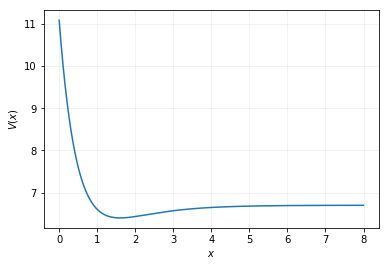

In [149]:
plt.plot(x,V)
plt.grid(alpha=0.2)
plt.xlabel('$x$')
plt.ylabel('$V(x)$')



<div class="alert alert-info">
**Problem 4: The Morse potential**
<br>

<ol>
<li>Use the shooting method to obtain the energy and wavefunction for the **ground state** ($n=0$) of the one-dimensional Morse potential, for the case $C_0=6.4$, $D_e=0.3$, $a=1$, and $x_e=1.6$.
<br><br>
Use atomic units ($\hbar=m=1$), and the discretized domain $0\leq x\leq 8$, with an appropriate value for $\Delta x$.
<br>

</li>
<br>
<li>The exact solution for the ground state energy is $$E_0=\frac{251+4\sqrt{15}}{40}$$ What is the fractional error in your result?</li>
</ol>
</div>